# Artificial Neural Network

### Importing the libraries

In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [58]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [59]:
dataset = pd.read_csv('../data/Churn_Modelling.csv')

# when trainiug the model, we ignore irrelevant columns that don't have an impact in predictons (i.e. `customerId`, `surname`, etc)
# also, the dependent variable (`exited`) is removed from the training data
print(dataset.head(0))
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [60]:
# the independent variables
print(pd.DataFrame(X))

        0        1       2   3   4          5  6  7  8          9
0     619   France  Female  42   2        0.0  1  1  1  101348.88
1     608    Spain  Female  41   1   83807.86  1  0  1  112542.58
2     502   France  Female  42   8   159660.8  3  1  0  113931.57
3     699   France  Female  39   1        0.0  2  0  0   93826.63
4     850    Spain  Female  43   2  125510.82  1  1  1    79084.1
...   ...      ...     ...  ..  ..        ... .. .. ..        ...
9995  771   France    Male  39   5        0.0  2  1  0   96270.64
9996  516   France    Male  35  10   57369.61  1  1  1  101699.77
9997  709   France  Female  36   7        0.0  1  0  1   42085.58
9998  772  Germany    Male  42   3   75075.31  2  1  0   92888.52
9999  792   France  Female  28   4  130142.79  1  1  0   38190.78

[10000 rows x 10 columns]


In [61]:
# the dependent variables
print(pd.DataFrame(y))

      0
0     1
1     0
2     1
3     0
4     0
...  ..
9995  0
9996  0
9997  1
9998  1
9999  0

[10000 rows x 1 columns]


### Encoding categorical data

Label encidong is used to encode column values into a numerical representation. This way you can feed it into the NN for computation.

A brief overview of `Label` and `One-hot` (strange name), can be found here: 

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

Label Encoding the "Gender" column

This will replace `male`/`female` with `0` and `1` respectively.

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [63]:
print(pd.DataFrame(X[:, 2]))

      0
0     0
1     0
2     0
3     0
4     0
...  ..
9995  1
9996  1
9997  0
9998  1
9999  0

[10000 rows x 1 columns]


One Hot Encoding the "Geography" column

This will create three new columns (since we started from three distinct geographic regions).

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [65]:
# the newly added columns
print(pd.DataFrame(X[:, :3]))

        0    1    2
0     1.0  0.0  0.0
1     0.0  0.0  1.0
2     1.0  0.0  0.0
3     1.0  0.0  0.0
4     0.0  0.0  1.0
...   ...  ...  ...
9995  1.0  0.0  0.0
9996  1.0  0.0  0.0
9997  1.0  0.0  0.0
9998  0.0  1.0  0.0
9999  1.0  0.0  0.0

[10000 rows x 3 columns]


### Splitting the dataset into the Training set and Test set

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

Scale the input features of a dataset to ensure that they are on a similar scale. This process can have a significant impact on the training process and the performance of the NN

For a more elaborate explanation see https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Here, we store the scaler for later use during inference

In [68]:
import pickle

# in prod, we should probaly serialize sc & model state for later use during inference.
pickle.dump(sc, open('scaler.pkl', 'wb'))

### Initializing the ANN

In [69]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [70]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [71]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [72]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [73]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [74]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 801us/step - loss: 0.5489 - accuracy: 0.7797
Epoch 2/100
250/250 [==============================] - 0s 829us/step - loss: 0.4926 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 805us/step - loss: 0.4751 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 839us/step - loss: 0.4578 - accuracy: 0.7984
Epoch 5/100
250/250 [==============================] - 0s 805us/step - loss: 0.4438 - accuracy: 0.8065
Epoch 6/100
250/250 [==============================] - 0s 800us/step - loss: 0.4372 - accuracy: 0.8106
Epoch 7/100
250/250 [==============================] - 0s 800us/step - loss: 0.4327 - accuracy: 0.8104
Epoch 8/100
250/250 [==============================] - 0s 810us/step - loss: 0.4295 - accuracy: 0.8114
Epoch 9/100
250/250 [==============================] - 0s 815us/step - loss: 0.4266 - accuracy: 0.8129
Epoch 10/100
250/250 [==============================] - 0s 806us/step - l

#### Here we store the model for later use during inference


In [75]:
import pickle
pickle.dump(ann, open('model.pkl', 'wb'))

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

During inference, we need to pay attention to the scaling of the input data. It needs to match the same scaling that we used on the training data. Hence the call to `sc.transform()`.

Why not use `sc.fit()`? 

"The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling. The transform(data) method is used to perform scaling using mean and std dev calculated using the . fit() method. The fit_transform() method does both fits and transform"

See https://www.geeksforgeeks.org/what-is-the-difference-between-transform-and-fit_transform-in-sklearn-python/

In [76]:
# load the previously saved scaler & model
import pickle
model = pickle.load(open("model.pkl", 'rb'))
scaler = pickle.load(open("scaler.pkl", 'rb'))
print(model.predict(scaler.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 34ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [77]:
y_pred = model.predict(X_test)
y_pred = (y_pred > .5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 657us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

See https://www.simplilearn.com/tutorials/machine-learning-tutorial/confusion-matrix-machine-learning

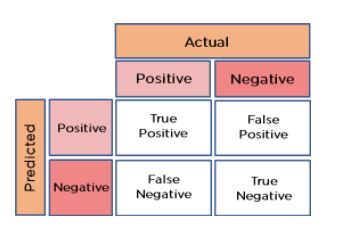

In [78]:
from IPython.display import Image
Image("https://www.simplilearn.com/ice9/free_resources_article_thumb/confusion-matrix.JPG")

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1507   88]
 [ 195  210]]


0.8585